# Introduction
* YOU HAVE TO run cell in "Download Images" to prepare images for the code following.



# 1. Download images 

In [1]:
%%shell

# RUN THIS CELL

###############################################################################################################
## Guidelines for sharing files
## 1. share a file (here, zip) with "anyone with link" in GoogleDrive
## 2. copy the link, here: https://drive.google.com/file/d/1qpoaVMI68ve23awAVAefM6352_1DE_rb/view?usp=sharing
## 3. extract the file-id, here: 1qpoaVMI68ve23awAVAefM6352_1DE_rb
## 4. download the file-id with gdown, as follows
###############################################################################################################

IMAGES="1qpoaVMI68ve23awAVAefM6352_1DE_rb"
cd /content/
rm -rf images.zip
rm -rf images
gdown -q --id $IMAGES --output images.zip
unzip -q images.zip
rm -rf images.zip

# 2. Create figures presented in slide "Chapter2"
## 2.1 Samples for slide 2.16

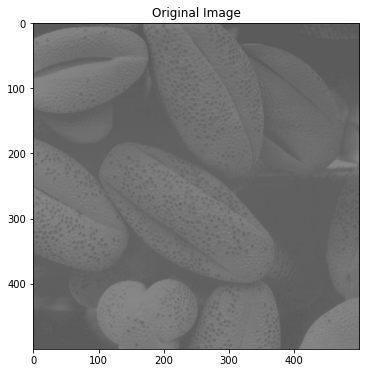

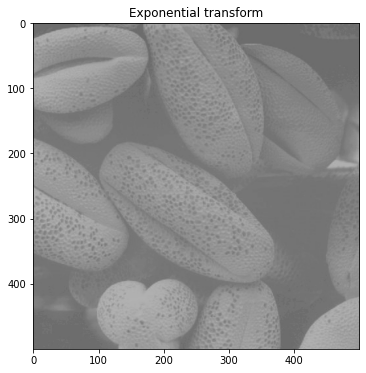

In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from matplotlib.colors import NoNorm
import math

def read_image(filename, color=True):
  return cv2.cvtColor(cv2.imread(filename, 1 if color else 0), cv2.COLOR_BGR2RGB)

"""
if image_data is in color format then RGB must be used
"""
def write_image(filename, image_data):
  image_data = cv2.cvtColor(image_data, cv2.COLOR_RGB2BGR)
  cv2.imwrite(filename, image_data)

def show_image(image, title="sample", figsize=(8,6), tickoff=False):
  plt.figure(figsize=figsize)
  if image.ndim == 2:
      plt.imshow(image, cmap="gray", norm=NoNorm())
  else:
      plt.imshow(image)
  plt.title(title)
  plt.show()


image_gray = read_image("./images/Fig3.15(a)3.jpg", color=False)
show_image(image_gray, "Original Image")

image_gray = image_gray/255.0 # => [0,1]
a, b = 1, -1
image_gray = (((a * np.exp(image_gray) + b)*255.0).clip(0,255)).astype(np.uint8)
show_image(image_gray, "Exponential transform")

## 2.2 Code for other figures
Should create fig

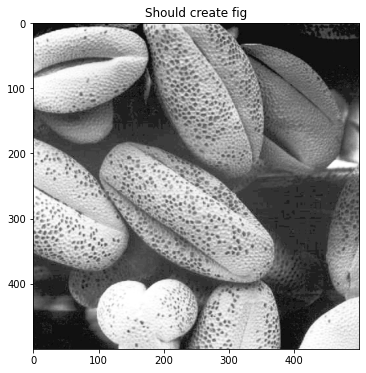

In [12]:
def imhist_v1(image_gray, density=True):
  if density:
    total = len(image_gray[0])*len(image_gray[1])
  else:
    total = 1
  return [cv2.calcHist([image_gray], [0], None, [256], [0, 256])/total]
dimx, dimy = image_gray.shape
hist = imhist_v1(image_gray)
cumsum = np.cumsum(hist[0])
goodImage = cumsum[image_gray]
show_image(goodImage, "Should create fig")